# Filter

In image processing, a filter refers to a **mathematical operation** applied to an image to modify or enhance its characteristics, such as **smoothing, sharpening, edge detection, or noise reduction**. Filters typically involve **manipulating pixel** values based on a **kernel** (a small matrix or grid of numbers used to apply effects to an image, such as blurring, sharpening, or edge detection) and their neighborhood relationships.

### To Visualize popular filters, run filter_visualization.py file.

Filter is a **2-D array** where as Image is a 3-D array (2-D array with 3 channels). So, the filter is **applied** to the Red, Green, and Blue channels **independently**.

### Steps for Applying a Filter to an RGB Image
   - **Decompose:** Split the image into its Red, Green, and Blue channels.
   - **Filter Application:** Apply the chosen filter to each channel.
   - **Reconstruct:** Merge the processed channels back to form the final RGB image.

Some operations, like edge detection, may **combine all channels into a single grayscale representation** (e.g., by converting to luminance or intensity), **apply the filter**, and then optionally map the results back to RGB space.

### Definitions:
- **Sharpening:** Enhance details in an image by amplifying the differences between neighboring
- **Blurring:** Reduce noise and details by averaging neighboring pixel values.
- **Edge Detection:** Highlight the boundaries between different regions in an image
- **Noise Reduction:** Remove unwanted noise from an image by averaging neighboring pixel values.

## Create Custom Filter

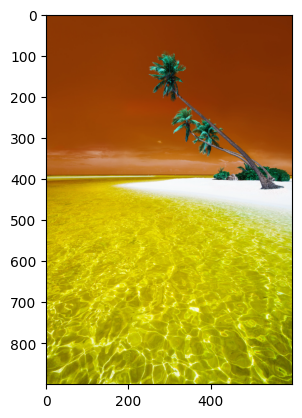

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

#Load Image
rgb_image = cv2.imread("./data/beach-blue.jpg")
plt.imshow(rgb_image)

### Create Kernel

In [2]:
Kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

### Create function to apply filter to an Image

Text(0.5, 1.0, 'Filtered Image')

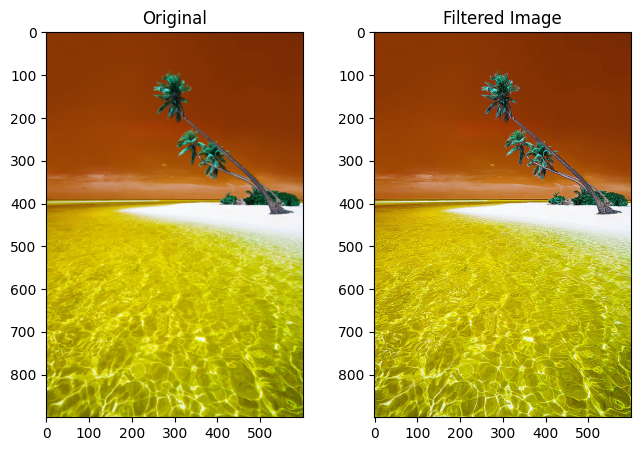

In [3]:
def apply_filter(image, filter):
    b, g, r = cv2.split(image)
    b_new = cv2.filter2D(b, -1, filter)
    g_new = cv2.filter2D(g, -1, filter)
    r_new = cv2.filter2D(r, -1, filter)
    image_filtered = cv2.merge([b_new, g_new, r_new])
    return image_filtered

filtered_image = apply_filter(rgb_image,filter=Kernel)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(filtered_image)
plt.title("Filtered Image")

##### It is very clear that Filtered Image is more sharper than the Original Image.

### Define another function to include Arrangements

Text(0.5, 1.0, 'Filtered GRB Image')

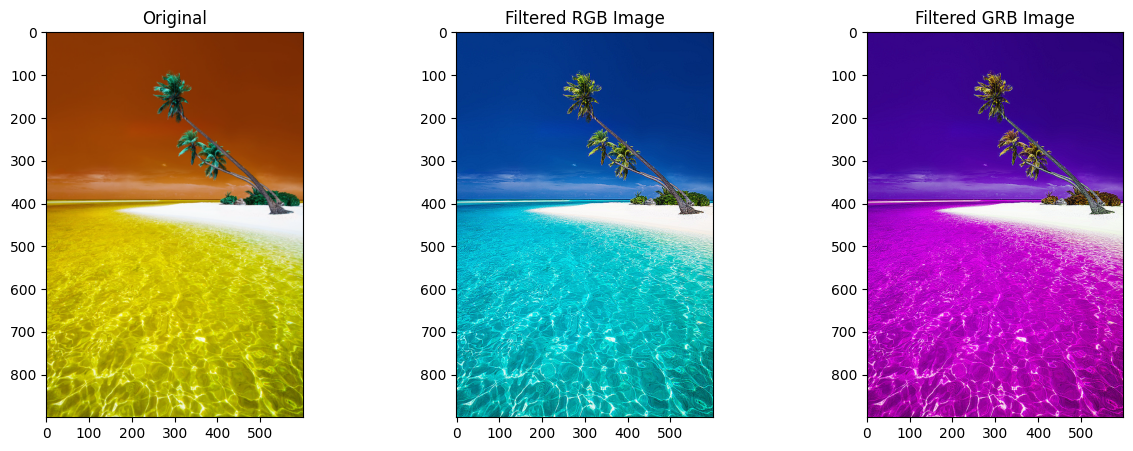

In [4]:
def apply_filter(image, filter, arrange):
    b, g, r = cv2.split(image)
    b_new = cv2.filter2D(b, -1, filter)
    g_new = cv2.filter2D(g, -1, filter)
    r_new = cv2.filter2D(r, -1, filter)
    if arrange=="RGB":
        image_filtered = cv2.merge([r_new, g_new, b_new])
    if arrange=="BGR":
        image_filtered = cv2.merge([b_new, g_new, r_new])
    if arrange=="GRB":
        image_filtered = cv2.merge([g_new, r_new, b_new])
    return image_filtered

filtered_image_rgb = apply_filter(rgb_image, filter=Kernel, arrange="RGB")
filtered_image_grb = apply_filter(rgb_image, filter=Kernel, arrange="GRB")

# Display Results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_rgb)
plt.title("Filtered RGB Image")

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_grb)
plt.title("Filtered GRB Image")

# Blurring and Sharpening
- Blurring is useful for reducing noise.

    -  **Gaussian blur** is a technique to **reduce noise and detail** by averaging pixel values in a neighborhood, weighted by a Gaussian kernel (a bell-shaped curve). A **larger kernel** size will result in **more blurring**, while a smaller kernel size will cause less blurring. Decreasing it (e.g., (3, 3)) will reduce the blurring effect.

    - (5, 5) is the size of the kernel, which determines how much the image will be blurred. Larger values result in a blurrier image.

    - 0 specifies the standard deviation for the Gaussian function. Here, it is automatically calculated based on the kernel size.

- Sharpening enhances edges.

    - The **sharpening effect** is controlled by the values in the **convolution kernel** applied with cv2.filter2D(). The larger the center value (the 5 in your kernel), the sharper the result. The surrounding values (-1 in your case) determine how much contrast is applied between the current pixel and its neighbors.

    - **Increase sharpening** by **increasing the center value** (e.g., changing 5 to 7 or 9).
    - Decrease sharpening by reducing the center value (e.g., changing 5 to 3 or 1).

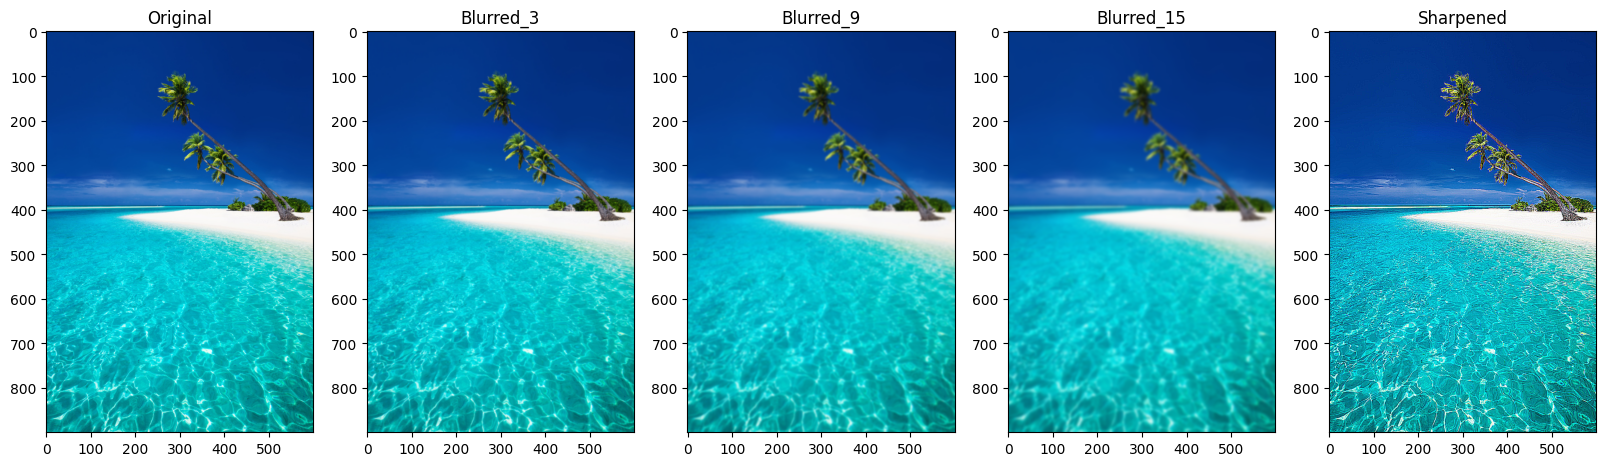

In [5]:
# Load the image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define kernel size to give blurrring effects
kernelSizes = [(3, 3), (9, 9), (15, 15)] # 3x3 matrix (small) --- less blurrier Image, # 15x15 matrix (large) --- more blurrier Image

# Blurring the Image
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)

# Sharpening the Image
# kernel_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)
# sharpened = cv2.filter2D(sharpened, -1, kernel_2)

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')

plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')

plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')

plt.subplot(1, 5, 5)
plt.imshow(sharpened)
plt.title('Sharpened')

plt.show()

It is evident that Blurred_3 has minimal blurring, while Blurred_15 appears significantly more blurred compared to the original image. Additionally, the final image demonstrates noticeable sharpness.

# Enhancing Images: Contrast Adjustment, Sharpening

We will use **CLAHE (Contrast Limited Adaptive Histogram Equalization)** for improving contrast. CLAHE function is designed for **grayscale images**, but we will seperate each channel to LAB and apply for RGB as well.

Unlike global histogram equalization, which adjusts contrast based on the overall histogram, **CLAHE** operates on s**maller tiles (grids)** and applies contrast adjustment to **each region individually**.

### How CLAHE Works

**1. Divide Image into Tiles:**
    - The image is divided into smaller regions called tiles, based on the tileGridSize parameter. Each tile is independently equalized to enhance contrast.
    - **Smaller grid size (e.g., (4, 4)):** Each tile covers a larger area, resulting in broader, less localized contrast adjustments.
    - **Larger grid size (e.g., (8, 8)):** Each tile covers a smaller area, allowing for finer, more localized contrast enhancements.

**2. Apply Histogram Equalization:**
    - Within each tile, **histogram equalization redistributes** pixel intensities to make the image brighter and increase contrast.

**3. Contrast Limiting (via Clip Limit):**
    - To avoid over-amplifying noise and overly bright areas, the contrast enhancement is limited using the clipLimit parameter. If the pixel intensity in a region exceeds this limit, the excess is **redistributed** across the histogram.
    - **Higher clipLimit** allows **more contrast enhancement**, resulting in a **sharper** image but may amplify noise if set too high.
    - **Lower cliplimit** limits contrast enhancement, producing a more **subtle** effect and reduces the risk of amplifying noise.

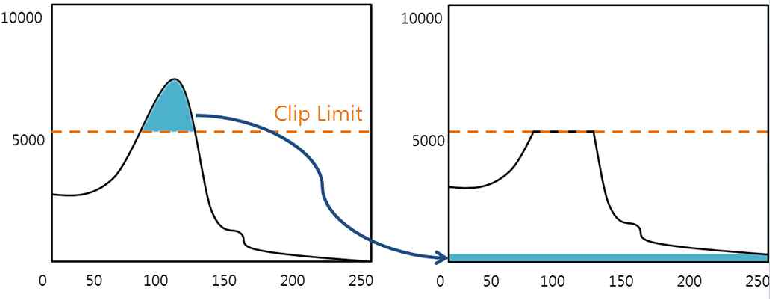

**4. Smooth Transitions:**
    - To prevent artifacts **at the borders of tiles**, CLAHE blends the enhanced tiles smoothly to produce a continuous, natural-looking image.

Text(0.5, 1.0, 'Enhanced Contrast')

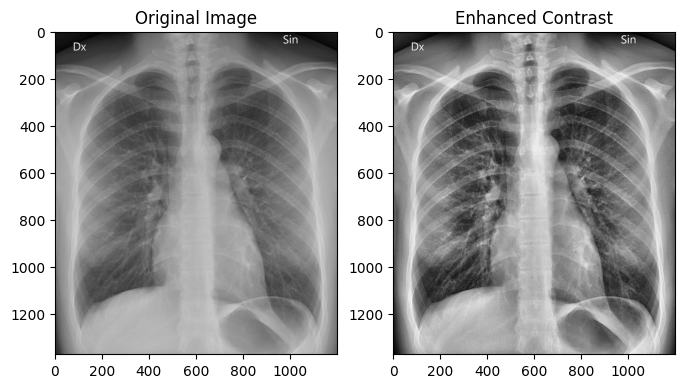

In [6]:
# Load Image and convert it into Gray 
image = cv2.imread('./data/xray.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create CLAHE and apply it to the Gray Image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) # Split Image into 8x8 Grid  
cl1 = clahe.apply(gray)

# Plot Images
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')
plt.title('Enhanced Contrast')

## CLAHE on RGB images uing LAB colour space

To apply CLAHE on RGB images we will use **LAB colour space**. LAB color space is a color model designed to **approximate human vision**, often used for image processing tasks like **color correction and contrast adjustment**.

- **L Channel (Lightness)**
    - Values range from **0 (black) to 100 (white)**.
    - Modifying this channel affects the **brightness and contrast** of the image without altering its color.
- **A Channel (Green-Red)**
    - Represents the color information on the green to red axis.
    - **Negative** values indicate **green**, and **positive** values indicate **red**.
- **B Channel (Blue-Yellow)**
    - Represents the color information on the blue to yellow axis.
    - **Negative** values indicate **blue**, and **positive** values indicate **yellow**.

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

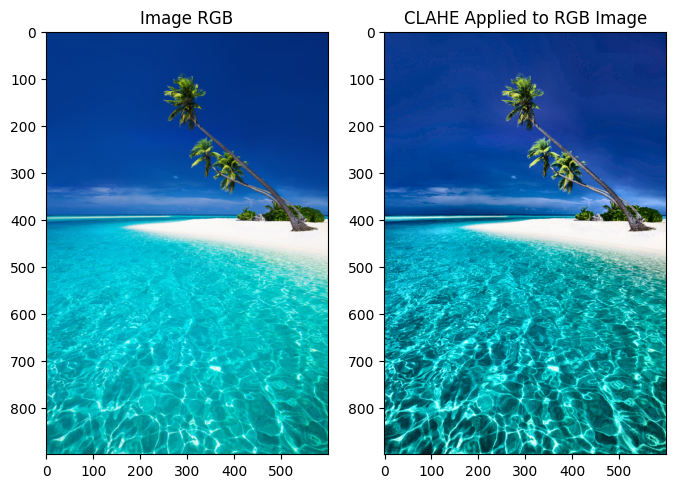

In [ ]:
# Load Image and convert it into LAB color space 
image = cv2.imread("./data/beach-blue.jpg")
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) 
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")

## CLAHE on RGB images using channel splitting

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

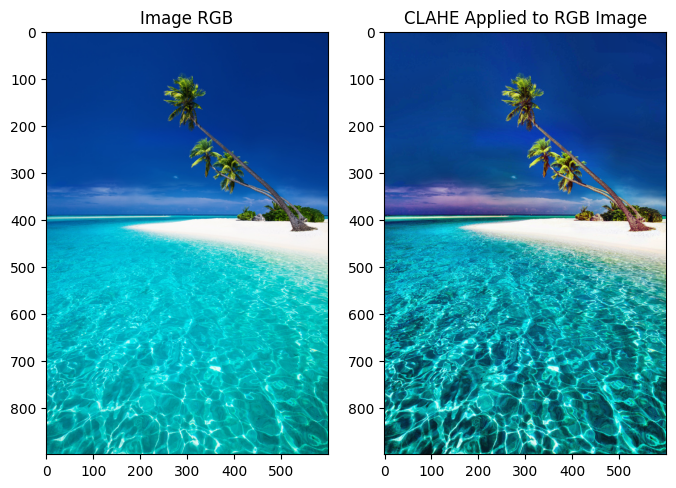

In [14]:
# Load the image in RGB format
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the RGB image into its channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Create a CLAHE object with specific parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to each channel separately
r_clahe = clahe.apply(r_channel)
g_clahe = clahe.apply(g_channel)
b_clahe = clahe.apply(b_channel)

# Merge the CLAHE-enhanced channels back into an RGB image
image_clahe_rgb = cv2.merge((r_clahe, g_clahe, b_clahe))

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe_rgb)
plt.title("CLAHE Applied to RGB Image")

# Adding Noise to image

Adding noise to images during computer vision training is a common technique to **simulate real-world scenarios** and improve the robustness and generalization ability of machine learning models.

**Importance od adding noise**

**1.  Simulating Real-World Variability**
    - In real-world applications, images often contain various types of noise due to:
        - **Sensor limitations:** Noise from camera sensors, especially in low-light conditions.
        - **Environmental conditions:** Motion blur, shadows, and reflections.
        - **Compression artifacts:** Lossy image formats like JPEG can introduce noise and artifacts. By training on noisy images, the model learns to handle these variations, making it more resilient to real-world data.

**2. Reducing Overfitting**
    - Adding noise acts as a form of data augmentation:
        - Noise **introduces randomness** and prevents the model from memorizing exact pixel patterns.
        - This encourages the model to **focus on meaningful features** (e.g., edges, shapes, and textures) rather than noise-sensitive details.

**3. Improving Generalization**
    - Training on noisy images ensures the model **performs well on diverse inputs**, including those with unexpected variations. This leads to **better performance on test datasets** that may differ from the training dataset.

**4. Robustness to Adverse Conditions**
    - In real-world scenarios, computer vision systems often encounter noisy data. Examples include:
        - **Autonomous vehicles:** Images might have motion blur, rain streaks, or dust.
        - **Medical imaging:** Scans may contain noise due to equipment variability or patient movement.
        - **Security cameras:** Low resolution, motion blur, or poor lighting can degrade image quality. By training with noisy images, the model becomes robust to such challenges.

**5. Data Augmentation for Limited Datasets**
    - In cases where labeled data is scarce, adding noise artificially increases the diversity of the training data without requiring additional labeling. This enhances the dataset's representativeness.

**For example, Training a facial recognition system:**
    - In real life, a person's face might appear blurry or grainy due to low lighting or camera quality.
    - If the model is only trained on clean, high-resolution images, it might fail to recognize faces in noisy conditions.
    - Adding noise during training ensures the model can handle poor-quality images while still identifying the correct face.

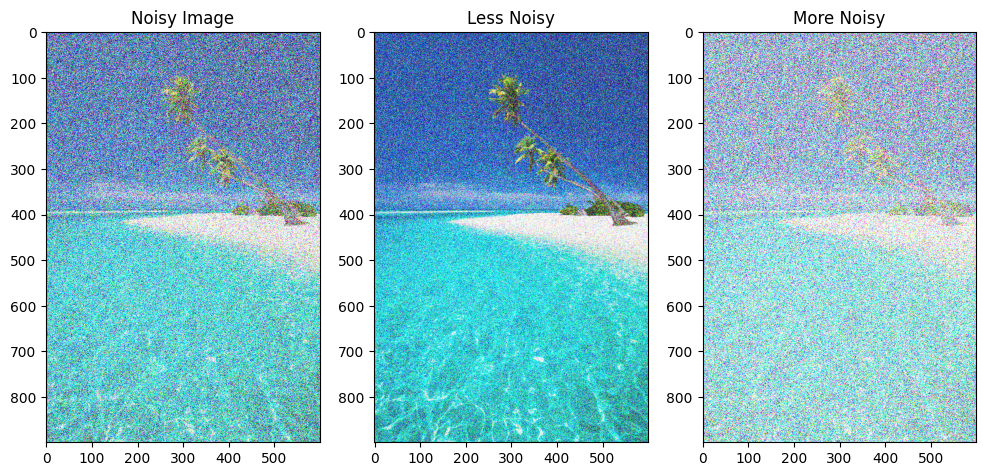

In [18]:
# Load Image 
image = cv2.imread('./data/beach-blue.jpg')

# Create Noise Image
noise_1 = np.random.normal(80, 150, image.shape) # Pixel range in the noise Image is fixed between 80-150.
noise_2 = np.random.normal(40, 80, image.shape) # Low Noise / Darker Noise.
noise_3 = np.random.normal(200, 240, image.shape) # Very Noisy.

# Add Noise into the Image
noisy_image_1 = image + noise_1
noisy_image_2 = image + noise_2
noisy_image_3 = image + noise_3

# Clipping values of noisy Image between 0-255 
noisy_image_1 = np.clip(noisy_image_1, 0, 255).astype(np.uint8) # Pixel Value should be in the range of 0-255.
noisy_image_2 = np.clip(noisy_image_2, 0, 255).astype(np.uint8)
noisy_image_3 = np.clip(noisy_image_3, 0, 255).astype(np.uint8)

# Convert into RGB
noisy_image_1 = cv2.cvtColor(noisy_image_1, cv2.COLOR_BGR2RGB)
noisy_image_2 = cv2.cvtColor(noisy_image_2, cv2.COLOR_BGR2RGB)
noisy_image_3 = cv2.cvtColor(noisy_image_3, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image_1)
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_2)
plt.title('Less Noisy')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_3)
plt.title("More Noisy")

plt.show()

# Resize

**Interpolation in Image Resizing:**

Interpolation in image resizing refers to the method used **to estimate pixel values at new positions** when an image is scaled up or down. Since resizing **changes the image's dimensions**, new pixels need to be computed to fit the desired size. Interpolation determines how these new pixel values are calculated based on surrounding pixels. 

(900, 600, 3)
(112, 75, 3)


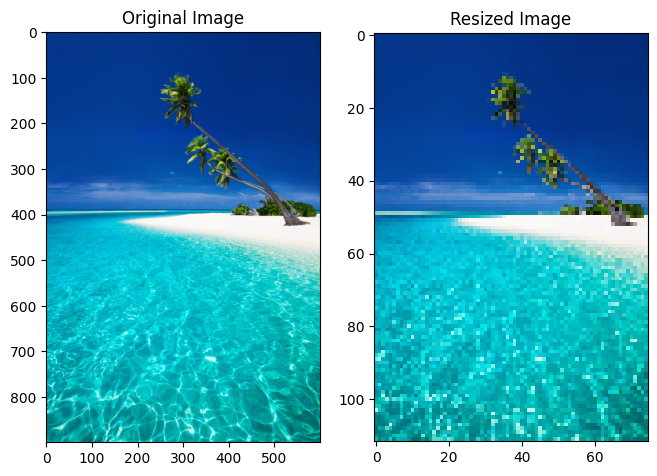

In [22]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the height and width of an Image 
height, width, _ = image_rgb.shape # we are not using channels for resizing.
print(image_rgb.shape)

# Resize Image to new scaled dimensions
new_width = int(width/8) # Pixels are scaled down 8 times --- This will worsen the Quality of the Image.
new_height = int(height/8)
new_points = (new_width, new_height)

rescaled_img = cv2.resize(image_rgb, new_points, interpolation= cv2.INTER_LINEAR) 
print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

We resized an image with dimensions (900, 600, 3) to (112, 75, 3) pixels. As a result, **some details were lost**, making the objects in the **image less clear** and harder to distinguish.

### Resize different aspect ratio to 1:1

(900, 600, 3)
(75, 75, 3)


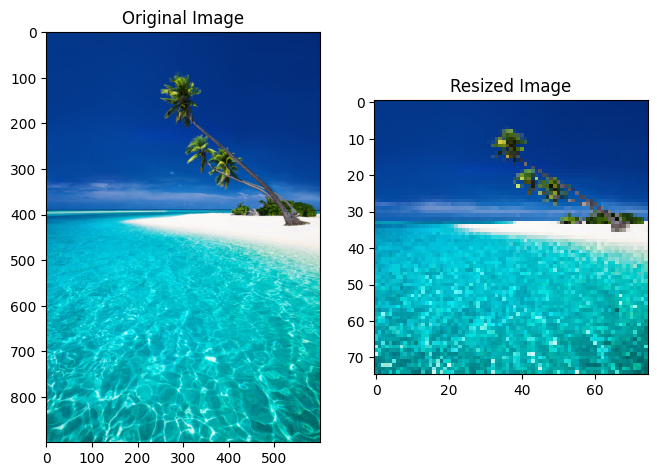

In [24]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the height and width of an Image 
height, width, _ = image_rgb.shape 
print(image_rgb.shape)

# Resize Image to new scaled dimensions
new_width = int(width/8) 
new_height = int(height/8)

# new_points = (new_width, new_height)
new_points = (new_width, new_width) # square image (1:1)

rescaled_img = cv2.resize(image_rgb, new_points, interpolation= cv2.INTER_LINEAR) 
print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

# Crop an image

Cropping is done by **slicing the image array**.

- image [y1:y2, x1:x2]
    - **y1:y2**: Defines the **height**
    - **x1:x2**: Defines the **width**

(900, 600, 3)
(400, 300, 3)


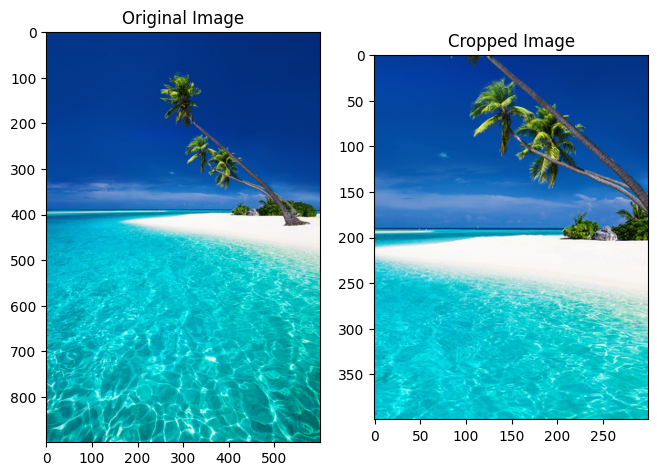

In [27]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Crop Image
cropped_image = image_rgb[200:600, 200:500]

print(image_rgb.shape)
print(cropped_image.shape)

# Display the result
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

# Image Rotation

We can rotate images by specific angles. 

Below are the example:

- cv2.ROTATE_90_CLOCKWISE
- cv2.ROTATE_90_COUNTERCLOCKWISE
- cv2.ROTATE_180

Text(0.5, 1.0, 'ROTATE_180')

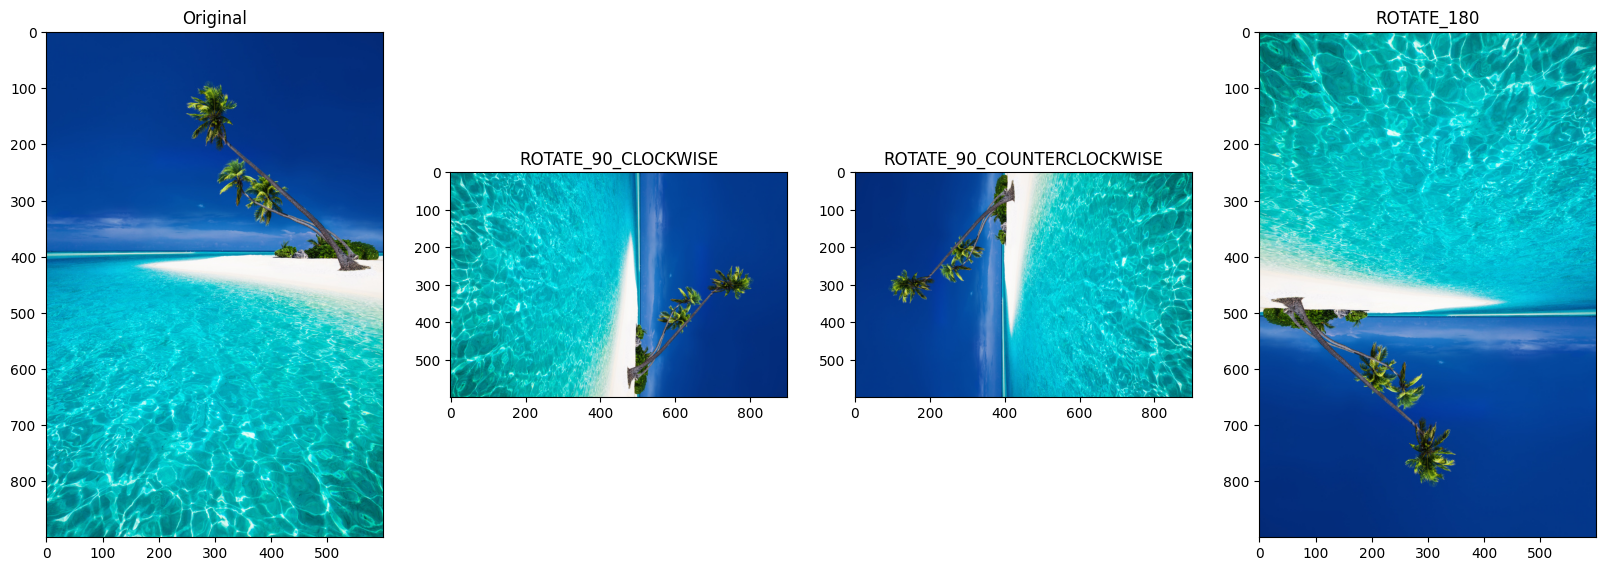

In [29]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Rotate Image
rotated_90c = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
rotated_90ac = cv2.rotate(image_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_180 = cv2.rotate(image_rgb, cv2.ROTATE_180)

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(1,4, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(rotated_90c)
plt.title('ROTATE_90_CLOCKWISE')

plt.subplot(1, 4, 3)
plt.imshow(rotated_90ac)
plt.title("ROTATE_90_COUNTERCLOCKWISE")

plt.subplot(1, 4, 4)
plt.imshow(rotated_180)
plt.title("ROTATE_180")

# Image Rotation using Affine transformations

- **getRotationMatrix2D()** function generates a 2D rotation matrix that can be used to rotate an image around a **specified center** point by a given angle.
    - M = **cv2.getRotationMatrix2D(center, angle, scale)**
    - **center:** A tuple (x, y) representing the center point around which the image will be rotated. 
    - **angle:** The angle of rotation in degrees. **Positive** values indicate **counter-clockwise** rotation, while **negative** values indicate **clockwise** rotation.
    - **scale:** A scaling factor. A value of 1 means no scaling, values **greater than 1 increase the size** of the image, and values **less than 1 decrease the size**.
    - **Returns a 2x3 rotation matrix** that can be used with cv2.warpAffine() to apply the rotation to an image.
- **cv2.warpAffine()** function applies an affine transformation to an image. It can be used to perform various transformations such as **rotation, translation, and scaling**.
    - dst = **cv2.warpAffine(src, M, dsize)**
    - **src:** source image
    - **M:** The 2x3 transformation matrix, which can be obtained from **cv2.getRotationMatrix2D()** or other transformation functions.
    - **dsize:** The **size of the output image** as a tuple (width, height). This specifies the dimensions of the resulting image **after the transformation**.
    - Returns the transformed image.

Affine transformations can be represented using a 2x3 transformation matrix. 

![2x3 Matrix](./data/2x3_matrix_raw.jpg)

- m00, m11 are scaling factors.
- m01, m10 are used for shearing and rotation.
- m02, m12 are used for translation. 
​
![2x3 Matrix](./data/2x3_matrix.jpg)

x_c, y_c is the center point around which the rotation occurs.

**Common Affine TRansformation**

- **Translation:** **Moves every point** of an image or shape by the same amount in a specified direction.
- **Scaling:** Resizes an image or shape by a scaling factor.
- **Rotation:** Rotates an image or shape around a specified point (often the center).
- **Shearing:** Slants the shape of an object along the x or y axis.

The 2x3 transformation matrix is essential in image processing for performing complex transformations in a compact and efficient manner. By manipulating the elements of this matrix, you can achieve various effects such as rotation, scaling, translation, and more.

Height and width of original image:  900 600


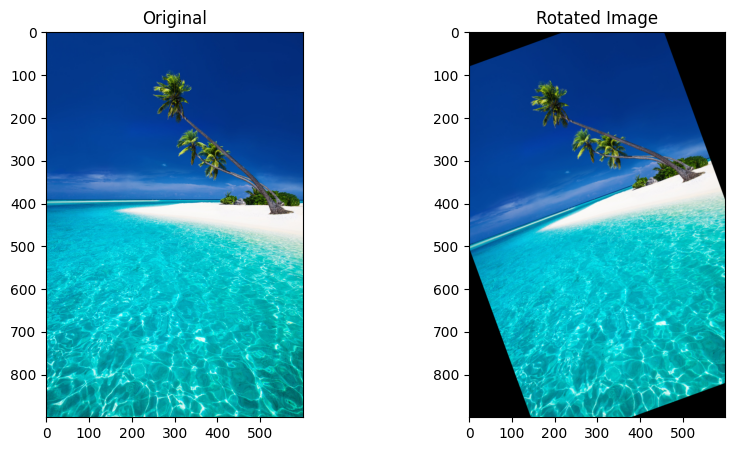

In [39]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image_rgb.shape[:2]
print("Height and width of original image: ", height, width)

# Get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)

# Get the rotation matrix using cv2.getRotationMatrix2D() --- "positive" for anti-clockwise & "Negative" for clockwise rotation
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1) # Rotating with the same scale without zooming at 20 deg. anti-clockwise direction 

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image_rgb, M=rotate_matrix, dsize=(width, height)) #dsize= width & height of a new Image.

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1,2, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1,2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image")

plt.show()

# Flipping Image

image = **cv2.flip(img, flipCode)**

- **flipCode = 0:** Flips the image **vertically** (around the x-axis).
- **flipCode = 1:** Flips the image **horizontally** (around the y-axis).
- **flipCode = -1:** Flips the image **both** vertically and horizontally (**180-degree** rotation).

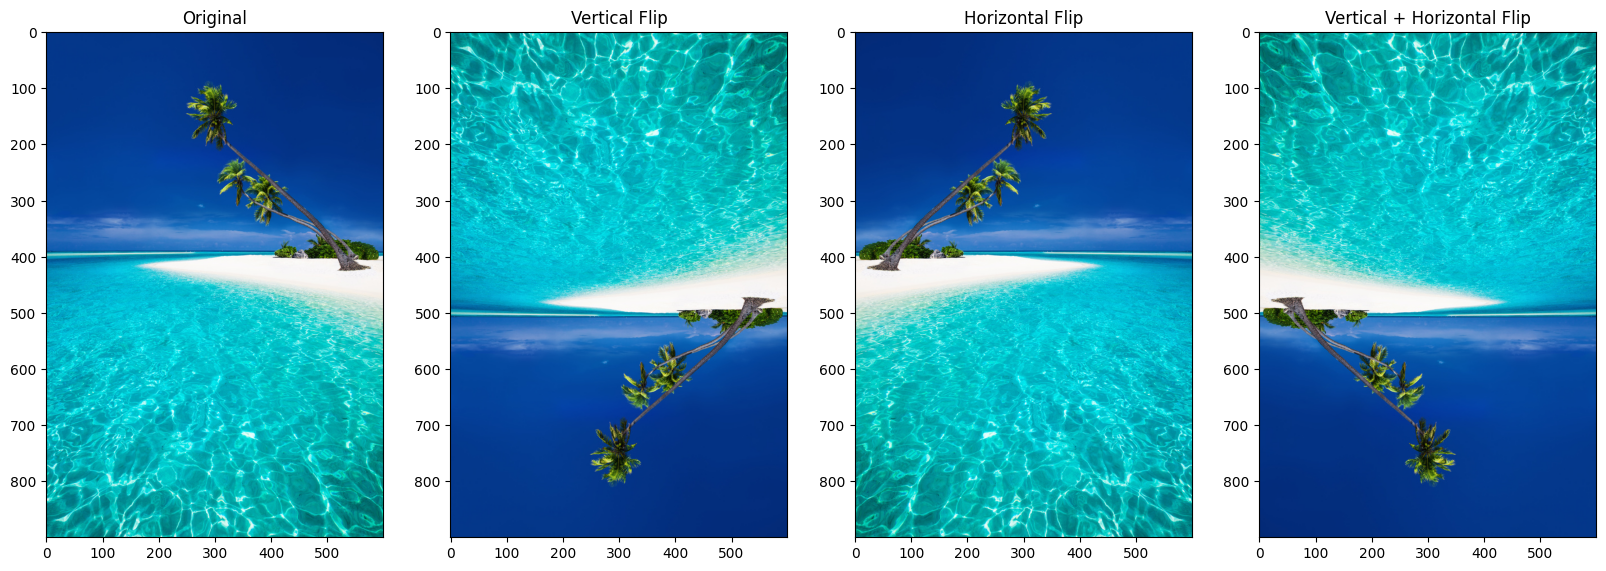

In [38]:
# Load Image and convert it into RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flip Image
flipped_v = cv2.flip(image_rgb, 0)  # Vertical flip
flipped_h = cv2.flip(image_rgb, 1)  # Horizontal flip
flipped_vh = cv2.flip(image_rgb, -1)  # 180 deg. flip

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(1,4, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(flipped_v)
plt.title("Vertical Flip")

plt.subplot(1, 4, 3)
plt.imshow(flipped_h)
plt.title("Horizontal Flip")

plt.subplot(1, 4, 4)
plt.imshow(flipped_vh)
plt.title("Vertical + Horizontal Flip")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase hspace for more vertical spacing